# Hypothesis Testing  ON A REAL LIFE EXAMPLE

From the past 30 years, every day, Nike is recording it’s shoe sales in every major city of India. Among these major cities, Jaipur is also there. You are a Data Analyst working for Rajasthan division of Nike. You have the data of everyday sales of shoes of Nike for the past 30 years (365 * 30 = 10,950 sales figures. Please have a look on the file for all the sales figure of Nike). Usually sales of Nike for Jaipur region fluctuate to some extent up and down but based on the sales figures collected from the past two weeks, you doubt that this is not the usual behaviour of sales figures and it may be the case that it is a sign of sales going down continously. These are sales figures of past two weeks: 
Day 1    Day 2    Day 3    Day 4    Day 5    Day 6    Day 7    Day 8    Day 9  Day 10  Day 11   Day 12   Day 13   Day 14 
2,07,567 1,50,899 1,20,456 1,75,123 2,30,908 1,01,234 1,10,267 1,03,456 98,567 2,75,00 2,15,979 1,11,111 1,90,000 97,034

So, you decided to look into the matter further only when you will determine that sales have highly significantly or statistically significantly decreased than the mean sales. If you found that the sales have decreased highly significantly or statistically significantly, you have a reason to doubt that people’s preference regarding Nike Haurache E.D.G.E (a model of Nike Shoe) has increased and people are liking that a lot in comparison to Nike Air Force 1’07 (another model of Nike Shoe) and that Nike is not manufacturing that shoe frequently so that the market demand can be fulfilled. Therefore, that shoe is running out of stock very fast and people are not buying any other shoe in a hope that soon stock will be fulfilled again. Therefore, you decided to take two samples of 500 people each and asked them regarding their shoe preference and you get some data (please see another file for the attachment). Do a hypothesis test first to determine that do really the sales going down or is it just a glitch? If you find that sales are going down then perform another hypothesis test to find out that do people really have a preference for Nike Haurache E.D.G.E shoe. 

In [1]:
#Importing required libraries that will be used for our project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [8]:
#Reading and importing csv file of sales data.
raw_data = pd.read_csv(r"C:\Users\Abhay\Documents\machine learning resources\Assignments\Assignment 1\Sale_Data.csv")

In [9]:
raw_data.head()

,Unnamed: 0,Sale
0,0,159000.562916
1,1,167522.521299
2,2,172103.705363
3,3,169740.078806
4,4,156169.964716


In [10]:
sales = raw_data ['Sale']

In [11]:
sales

0        159000.562916
1        167522.521299
2        172103.705363
3        169740.078806
4        156169.964716
5        154192.540443
6        176328.857151
7        161676.796466
8        190342.329650
9        175499.298712
10       170675.113592
11       161606.102845
12       156419.607335
13       166796.222339
14       179664.326638
15       154690.004573
16       174551.882436
17       157963.397487
18       173309.145436
19       158662.306163
20       136970.799956
21       172516.421877
22       156372.304428
23       180855.379868
24       174924.016167
25       164966.598760
26       171038.208029
27       155570.704363
28       170337.869052
29       163194.199449
             ...      
10920    162729.361466
10921    167490.923226
10922    180782.174782
10923    171347.424649
10924    158928.950995
10925    170151.860280
10926    179973.182864
10927    142535.826129
10928    155122.031347
10929    166336.188370
10930    168459.958090
10931    160758.402099
10932    17

For testing that the change in sales is significant or not we need to carry out a hypothesis test upon our sample data. We will be using Student t-test for our data as we are in small sample module. To carry out the test we need to find out the values of mean and standard deviation of our data. This can be achieved by the use MVU estimator, where we draw random samples from the sales data, calculate mean of these random samples and then plot the frequency distributuion of these sample means. To find the best estimate for mean of the population data we will be taking the point estimate from our sampling distribution. The mean value of our sampling distribution will be the best estimate for our mean value. Similarly, we will calculate the best estimate of our std. deviation of our data using the sampling distribution.

In [12]:
random_samples = np.random.choice(sales, size=(500,30))

In [13]:
random_sample_mean = np.mean(random_samples, axis=1)

In [14]:
random_sample_mean.shape

(500,)

(array([  8.,  14.,  49., 111., 137., 108.,  52.,  15.,   4.,   2.]),
 array([159042.98658522, 160374.93646829, 161706.88635136, 163038.83623443,
        164370.7861175 , 165702.73600057, 167034.68588364, 168366.63576671,
        169698.58564978, 171030.53553285, 172362.48541592]),
 <a list of 10 Patch objects>)

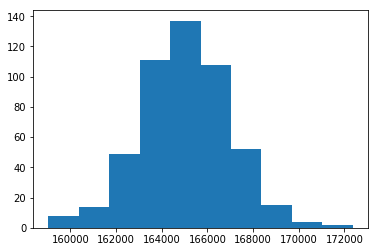

In [15]:
plt.hist(random_sample_mean)

In [16]:
best_estimate = np.mean(random_sample_mean)

In [17]:
best_estimate

165029.0477150534

In [18]:
random_samples_std = np.std(random_samples, axis=1)

In [19]:
best_estimate_std = random_samples_std.mean()

In [20]:
sample_mean = 138578.6

In [21]:
best_estimate_std

9670.006303402888

We have estimated the values of mean and std. deviation of our data. Now we will perform student t-test for our data to check if there is a significant difference in the sales or was it just a glitch. We need to calculate the value of t-statistic and then compare our value with that in the table. Thus we have 2 hypothesis,

            H0 : Null hypothesis - there is no significant difference in sales.
            Ha : Alternative hypothesis - there is a significant difference in sales.
           
To calculate the t-statistic we have the formula:
 $ t = \frac{(x-u)}{sigma}$

In [22]:
t = (best_estimate - sample_mean)/(best_estimate_std/np.sqrt(7))

In [23]:
t

7.236945305373938

The value of our calculated t-statistic exceeds the value from the table, so we will be accepting the Ha hypothesis, that is, there is a significant difference between the sales and it is not just a glitch.
Furthermore, we need to look if people have preference of Nike Haurache over Nike Airforce. To check for this we need to perform a paired z-test over the data of both these shoes. Here again we will have two hypothesis,

        Ho: People does not have any specific preference over Nike Haurache shoe.
        Ha: People have a preferece over Nike Haurache shoe.
Here we will use the z-statistic to look for the answer because we are in large sample domain.
            $ z = \frac{(p1_cap - p2_cap)}{sqrt(\frac{p1_cap*q1_cap}{N})+(\frac{p2_cap*q2_cap}{N})}$

In [18]:
sale_preferences = pd.read_csv(r"C:\Users\Abhay\Desktop\machine learning resources\Assignments\Assignment 1\Shoe_preference_data.csv")

In [20]:
sale_preferences.head()

,Unnamed: 0,Prefer Nike Air Force,Prefer Nike Air Vapormax,Prefer Nike Epic React Flyknit,Prefer Nike Haurache,Prefer Nike Zoom Pegasus
0,0,0,1,1,1,0
1,1,1,0,1,1,0
2,2,0,1,1,1,1
3,3,1,0,1,1,0
4,4,0,1,1,1,1


In [27]:
nike_haurache_p_cap = np.count_nonzero(sale_preferences['Prefer Nike Haurache'])/500

In [28]:
nike_haurache_p_cap

0.732

In [32]:
nike_airforce_p_cap = np.count_nonzero(sale_preferences['Prefer Nike Air Force'])/500

In [33]:
nike_airforce_p_cap

0.442

In [34]:
nike_haurache_q_cap = 1-nike_haurache_p_cap

In [35]:
nike_airforce_q_cap = 1-nike_airforce_p_cap

In [36]:
z_test = (nike_haurache_p_cap - nike_airforce_p_cap)/(np.sqrt((nike_haurache_p_cap*nike_haurache_q_cap)/500) + (nike_airforce_p_cap*nike_airforce_q_cap)/500)

In [37]:
z_test

14.284905590507856

Here we can see that the value of calculated z-statistic is far away from the value of z-statistic of the table, so we are accepting Ha, hence people have preference over Nike Haurache shoe.